#Proyecto Final Fase 2 Módulo 2 BEDU

##Procesamiento de datos con Python - Equipo 4

###Integrantes: 
- Juan Manuel Ledesma Rangel
- Hannia Melendres Samaniego
- Alejandro Cortéz Sánchez
- Martín Otamendi Torres
- Rodrigo Alvarado Gómez


---
##A. Identificación de un problema - Postwork 1

###A.1 Problema:
> Migración Ilegal de México a EUA

###A.2 Fundamento teórico del proyecto:
> Se puede encontrar en orden en el siguiente documento de Google: https://docs.google.com/document/d/1ZaYfFqN-BYprB7sjOddCJQ0kL0N6DMkUv_dTJy_gsgI/edit#


---
##B. Planteamiento de Preguntas - Postwork 2

Tras realizar la investigación preliminar, surgieron las siguientes preguntas (también encontradas dentro del documento comentado con anterioridad):

1.   ¿Cuántos (y cuáles) de los trámites son por cuestiones de deportación o migración ilegal?
2.   ¿Existe algún incremento en los casos de migración ilegal en mujeres?
3.   ¿Realmente hubo un deceso de migración ilegal entre 2014 y 2017?
4.   ¿Cuál es el porcentaje de menores de edad que cruzan la frontera ilegalmente por sí solos (ley TVPRA)?
5.   ¿De qué estado de la República Mexicana provienen la mayoría de los casos?




---
## C. Colección de Datos/Uso de APIs  - Postwork 3 y 6

Para el análisis, utilizaremos el dataset (en formato .csv)...

>"Migratorio - Casos de protección y/o asistencia consular atendidos por la Red Diplomática Consular de México en el mundo"

aportado por la Secretaría de Relaciones Exteriores (SRE) desde la página de datos.gob.mx.

Para realizar el análisis exploratorio de datos (AED), importamos la librería "pandas" y convertimos el archivo .csv a dataframe desde su página de origen:

In [189]:
import pandas as pd

#Archivo CSV original recabado de la página del gobierno
#Fue necesario agregar "encoding= 'latin-1'" para poder leerlo

df = pd.read_csv('https://portales.sre.gob.mx/transparencia/datos_abiertos/DGPME/Migratorio_CasodeproteccionconsularatendidosporlaRDCMx.csv',
                 sep=',', encoding= 'latin-1')

---
##D. Análisis exploratorio de datos - Postwork 4

Hacemos una previsualización de los datos, para definir si será necesario hacer limpieza:

In [190]:
#Hacemos una previsualización de los datos

df.head(15)

,Casos de proteccion y/o asistencia consular atendidos en la RDCM en Estados Unidos - ámbito migratorio,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AÑO,NaN,2010,NaN,NaN,2011,NaN,NaN,2012,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ÁMBITO,RUBRO DE PROTECCIÓN,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MIGRATORIO,"INCIDENTES, MÚLTIPLES INVOLUCRADOS (MIGRATORIO)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,MENOR PROCESADO BAJO LEY TVPRA,1,373,135,NaN,375,112,NaN,357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,ORIENTACIóN GENERAL SOBRE CONSULTAS MIGRATORIA...,2,"1,734","1,472",6,"1,844","1,885",4,"1,687",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,OTROS CASOS DEL áMBITO MIGRATORIO,10,"4,423","1,026",6,"8,073","1,129",11,"8,545",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,PERMISOS DE INTERNACIóN POR RAZONES HUMANITARIAS,6,"1,143","1,352",NaN,"1,096","1,403",1,902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,PROCESOS JUDICIALES MIGRATORIOS DE REMOCIóN,16,"10,455","1,174",18,"18,514","1,413",26,"49,479",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,PROCESOS JUDICIALES MIGRATORIOS DE RESIDENCIA,NaN,339,413,1,775,304,1,260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###D.1 Análisis inicial:
Como podemos observar, todas nuestras columnas aparecen como "Unnamed" salvo la primera que dice: "Casos de proteccion y/o asistencia consular atendidos en la RDCM en Estados Unidos - ámbito migratorio". 

También se puede contemplar que la fila cero tiene puros NaNs, y que las filas 1 y 2 parecen ser encabezados que indican el año de los casos atendidos y el género de la persona atendida, respectivamente. 

Por otro lado, a partir de la columna "Unnamed: 42" se tienen puros NaNs en los número de casos atendidos. 

Por lo anterior este dataset es ideal para poner en práctica los conocimientos adquiridos en este curso.

###D.2 Entender el dataset:
A fin de poder entender mejor el dataset, será necesario observar otros parámetros de utilidad cómo sus dimensiones, columnas, tipos de dato, etc.

In [191]:
#Para ver las dimensiones
df.shape

(219, 52)

In [192]:
#Para ver las columnas que lo integran
df.columns

Index(['Casos de proteccion  y/o asistencia consular atendidos en la RDCM en Estados Unidos - ámbito migratorio',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51'],
      dtype='object')

In [193]:
#Para ver los tipos de dato por columna
df.dtypes

Casos de proteccion  y/o asistencia consular atendidos en la RDCM en Estados Unidos - ámbito migratorio     object
Unnamed: 1                                                                                                  object
Unnamed: 2                                                                                                  object
Unnamed: 3                                                                                                  object
Unnamed: 4                                                                                                  object
Unnamed: 5                                                                                                  object
Unnamed: 6                                                                                                  object
Unnamed: 7                                                                                                  object
Unnamed: 8                                                                      

De lo anterior podemos notar que tenemos dos tipos de dato en nuestro dataframe: "object" y "float64". Si observamos con mayor detalle, veremos que la razón por la que tenemos "object" se debe a que las primeras dos filas (que tendrían que ser encabezados) son contenido, y al detectar texto pandas convierte toda la columna a objeto.

Por último, para simplificar todo lo que vimos con anterioridad, y visualizar los NaNs en nuestro dataframe, utilizaremos "info": 

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 52 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Casos de proteccion  y/o asistencia consular atendidos en la RDCM en Estados Unidos - ámbito migratorio  17 non-null     object 
 1   Unnamed: 1                                                                                               204 non-null    object 
 2   Unnamed: 2                                                                                               170 non-null    object 
 3   Unnamed: 3                                                                                               179 non-null    object 
 4   Unnamed: 4                                                                            

Gracias a "info", podemos concluir que todas nuestras columnas contienen al menos 1 elemento NaN, ya que de las 219 filas que tenemos, la columna más cercana a un "Non-Null Count" perfecto tiene 204 filas con datos, resultando en 15 NaNs.

El mismo razonamiento puede utilizarse con el resto de las columnas. 

###D.3 Primer problema:
Este dataset, a pesar de estar en formato .csv, fue tratado como un archivo .xlsx. Esto lo podemos notar si abrimos el archivo en Excel, ya que encontramos varias tablas en una sola hoja de cálculo, además de comentarios en múltiples celdas y espacios en blanco, como se muestra en la siguiente imagen:

![Estructura en crudo del csv.png](https://github.com/JuanMaLR/bedu-equipo4-dataScience-P-FP/blob/main/images/raw_struc.png?raw=true)
(Las líneas rojas delimitan 3 de las 8 tablas presentes en la misma hoja de cálculo, únicamente para ejemplificar)

Propusimos separar en tablas individuales el csv original, que, por motivos del alcance del proyecto (énfasis en EUA), sólo fueron de nuestro interés 4 de las 8 tablas encontradas en el dataframe inicial. 

Cada tabla fue tratada como un archivo .csv individual, y se subió a nuestro repositorio de GitHub dentro de la carpeta "raw_data". A continuación sus lecturas en solitario:

In [195]:
#De las 8 tablas, se leen únicamente aquellas cuya información es relevante para el análisis del caso de EUA (4)
#Las convertimos a dataframe con pandas

casos = pd.read_csv('https://raw.githubusercontent.com/JuanMaLR/bedu-equipo4-dataScience-P-FP/main/raw_data/casos.csv', sep=',', encoding= 'latin-1')
oficinas = pd.read_csv('https://raw.githubusercontent.com/JuanMaLR/bedu-equipo4-dataScience-P-FP/main/raw_data/oficinas.csv', sep=',', encoding= 'latin-1')
edo_origen = pd.read_csv('https://raw.githubusercontent.com/JuanMaLR/bedu-equipo4-dataScience-P-FP/main/raw_data/edo_origen.csv', sep=',', encoding= 'latin-1')
rango_edad = pd.read_csv('https://raw.githubusercontent.com/JuanMaLR/bedu-equipo4-dataScience-P-FP/main/raw_data/rango_edad.csv', sep=',', encoding= 'latin-1')

Verificamos que se hayan cargado correctamente utilizando "head":

In [196]:
#Visualizando casos.csv

casos.head()

,AÑO,Unnamed: 1,2010,Unnamed: 3,Unnamed: 4,2011,Unnamed: 6,Unnamed: 7,2012,Unnamed: 9,...,Unnamed: 31,2020,Unnamed: 33,Unnamed: 34,2021,Unnamed: 36,Unnamed: 37,* 2022,Unnamed: 39,Unnamed: 40
0,ÁMBITO,RUBRO DE PROTECCIÓN,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,...,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER
1,MIGRATORIO,"INCIDENTES, MÚLTIPLES INVOLUCRADOS (MIGRATORIO)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1
2,NaN,MENOR PROCESADO BAJO LEY TVPRA,1,373,135,NaN,375,112,NaN,357,...,312,1,230,128,2,726,526,2,467,359
3,NaN,ORIENTACIóN GENERAL SOBRE CONSULTAS MIGRATORIA...,2,"1,734","1,472",6,"1,844","1,885",4,"1,687",...,"7,948",7,"2,584","2,451",4,"2,229","1,115",2,693,852
4,NaN,OTROS CASOS DEL áMBITO MIGRATORIO,10,"4,423","1,026",6,"8,073","1,129",11,"8,545",...,"6,519",142,"20,194","3,248",3,"12,009","2,985",1,"8,004","1,730"


In [197]:
#Visualizando oficinas.csv

oficinas.head()

,AÑO,Unnamed: 1,2019,Unnamed: 3,Unnamed: 4,2020,Unnamed: 6,Unnamed: 7,2021,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,ÁMBITO,REPRESENTACIÓN,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MIGRATORIO,ALBUQUERQUE,1,260,173,2,162,59,1,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,ATLANTA,0,660,285,2,287,164,NaN,146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AUSTIN,1,690,429,1,171,144,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,BOISE,0,82,63,3,62,47,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
#Visualizando edo_origen.csv

edo_origen.head()

,AÑO,Unnamed: 1,Unnamed: 2,2019,Unnamed: 4,Unnamed: 5,2020,Unnamed: 7,Unnamed: 8,2021,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,EDO. ORIGEN,NaN,NaN,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGUASCALIENTES,NaN,NaN,1,815,184,0,785,89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAJA CALIFORNIA,NaN,NaN,1,894,316,0,943,215,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAJA CALIFORNIA SUR,NaN,NaN,0,41,23,0,31,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CAMPECHE,NaN,NaN,1,255,46,1,266,21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
#Visualizando rango_edad.csv

rango_edad.head()

,AÑO,2019,Unnamed: 2,Unnamed: 3,2020,Unnamed: 5,Unnamed: 6,2021,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,Grupo de edad,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,De 00 a 17 años,50,"7,375","1,985",15,"5,569","1,326",1,"11,737","2,128",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,De 18 a 25 años,78,"20,381","4,514",57,"18,793","2,827",11,"10,538","1,903",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,De 26 a 35 años,143,"32,117","5,733",82,"27,261","3,425",7,"11,122","2,021",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,De 36 a 45 años,93,"24,630","5,599",40,"19,468","2,513",7,"8,729","1,570",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A simple vista resaltan las áreas de mejora de los dataframes que se mencionaron en un inicio: 


*   Filas de encabezados incorrectas
*   Procesamiento de NaNs
*   Tipos de dato incorrectos
*   Columnas innecesarias para nuestro planteamiento inicial


Sin embargo, observamos el resumen de cada uno de ellos para conocerlos más a fondo con ayuda de la función "info":

In [200]:
#Resumen de los dataframes - casos
print("Dataframe de casos")
print(casos.info())

Dataframe de casos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AÑO          2 non-null      object
 1   Unnamed: 1   17 non-null     object
 2   2010         12 non-null     object
 3   Unnamed: 3   16 non-null     object
 4   Unnamed: 4   16 non-null     object
 5   2011         11 non-null     object
 6   Unnamed: 6   16 non-null     object
 7   Unnamed: 7   16 non-null     object
 8   2012         10 non-null     object
 9   Unnamed: 9   16 non-null     object
 10  Unnamed: 10  16 non-null     object
 11  2013         8 non-null      object
 12  Unnamed: 12  16 non-null     object
 13  Unnamed: 13  16 non-null     object
 14  2014         9 non-null      object
 15  Unnamed: 15  16 non-null     object
 16  Unnamed: 16  16 non-null     object
 17  2015         12 non-null     object
 18  Unnamed: 18  16 non-null     object
 19  Unnamed: 19 

In [201]:
#Resumen de los dataframes - oficinas
print("Dataframe de oficinas")
print(oficinas.info())

Dataframe de oficinas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AÑO          2 non-null      object 
 1   Unnamed: 1   52 non-null     object 
 2   2019         52 non-null     object 
 3   Unnamed: 3   52 non-null     object 
 4   Unnamed: 4   52 non-null     object 
 5   2020         52 non-null     object 
 6   Unnamed: 6   52 non-null     object 
 7   Unnamed: 7   52 non-null     object 
 8   2021         24 non-null     object 
 9   Unnamed: 9   52 non-null     object 
 10  Unnamed: 10  52 non-null     object 
 11  * 2022       14 non-null     object 
 12  Unnamed: 12  52 non-null     object 
 13  Unnamed: 13  52 non-null     object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      f

In [202]:
#Resumen de los dataframes - estado de origen
print("Dataframe de estado de origen")
print(edo_origen.info())

Dataframe de estado de origen
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AÑO          36 non-null     object 
 1   Unnamed: 1   0 non-null      float64
 2   Unnamed: 2   0 non-null      float64
 3   2019         36 non-null     object 
 4   Unnamed: 4   36 non-null     object 
 5   Unnamed: 5   36 non-null     object 
 6   2020         36 non-null     object 
 7   Unnamed: 7   36 non-null     object 
 8   Unnamed: 8   36 non-null     object 
 9   2021         15 non-null     object 
 10  Unnamed: 10  36 non-null     object 
 11  Unnamed: 11  36 non-null     object 
 12  * 2022       15 non-null     object 
 13  Unnamed: 13  36 non-null     object 
 14  Unnamed: 14  36 non-null     object 
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-nul

In [203]:
#Resumen de los dataframes - rango de edad
print("Dataframe de rango de edad")
print(rango_edad.info())

Dataframe de rango de edad
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AÑO          11 non-null     object 
 1   2019         11 non-null     object 
 2   Unnamed: 2   11 non-null     object 
 3   Unnamed: 3   11 non-null     object 
 4   2020         11 non-null     object 
 5   Unnamed: 5   11 non-null     object 
 6   Unnamed: 6   11 non-null     object 
 7   2021         11 non-null     object 
 8   Unnamed: 8   11 non-null     object 
 9   Unnamed: 9   11 non-null     object 
 10  * 2022       11 non-null     object 
 11  Unnamed: 11  11 non-null     object 
 12  Unnamed: 12  11 non-null     object 
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null  

Está función nos arroja información sobre el tipo de datos, el nombre de las columnas, y la cantidad de registros y de no-nulls de un dataframe. Consideramos que esta función es suficiente para conocer la estructura de nuestro dataset, pero las dimensiones del mismo no son tan visibles. Por lo que utilizamos también la función "shape":

In [204]:
#Dimensiones
print(casos.shape)
print(oficinas.shape)
print(edo_origen.shape)
print(rango_edad.shape)

(17, 41)
(52, 41)
(52, 41)
(52, 41)


A pesar de haber realizado la separación del archivo .csv original en cuatro distintos, los datos siguen estando sucios en demasía. Contienen bastantes datos NotaNumber (NaN), los encabezados no están definidos, la mayoría de tipos de datos son objetos, y hay filas y columnas innecesarias.

Así, procedemos a la limpieza de los datos.

---
##E. Limpieza del DataFrame (Postwork 5) y transformación de datos (Postwork 7)

Ambas partes del proceso van tan de la mano, que decidimos unirlas en un solo apartado. Eso sí, están seccionadas para facilitar la lectura.


###E.1 Encabezados
Para comenzar, arreglaremos las filas de encabezado, ya que nos sería imposible realizar cualquier análisis sobre los datos de esta manera.

Si recurrimos a los archivos desde una hoja de cálculo, notamos que esto se debe a que en realidad tienen dos encabezados, y todos los .csv que creamos siguen el mismo patrón:

![Patrón de encabezado.png](https://github.com/JuanMaLR/bedu-equipo4-dataScience-P-FP/blob/main/images/pattern.png?raw=true)

Decidimos unir ambas filas para simplificar el dataframe colocando nb (no binario) para DESC., h para HOMBRE y m para MUJER, seguido del año en que se realizó el registro. Por ejemplo: h_2010.

Con el fin de no realizarlo "a mano" (y porque es un detalle que se repite en todos los dataframes), crearemos una función y la reciclaremos. 

Sin embargo, antes de hacer esto será necesario que los 4 dataframes tengan la misma estructura para que nuestra función pueda aplicarse sin problema. 

####E.1.1 Visualización de columnas irrelevantes
Si recordamos, al visualizar el "head" de nuestros 4 dataframes en el punto anterior (D. AED), pudimos notar que los dataframes de casos y oficinas tienen una primera columna que en filas 0 y 1 muestran "ámbito" y "migratorio", respectivamente, pero el resto de la columna son puros NaNs. 

Esta columna no aporta información, por lo tanto la eliminaremos.

In [205]:
#Para visualizar el dataframe de casos
casos.head(10)

,AÑO,Unnamed: 1,2010,Unnamed: 3,Unnamed: 4,2011,Unnamed: 6,Unnamed: 7,2012,Unnamed: 9,...,Unnamed: 31,2020,Unnamed: 33,Unnamed: 34,2021,Unnamed: 36,Unnamed: 37,* 2022,Unnamed: 39,Unnamed: 40
0,ÁMBITO,RUBRO DE PROTECCIÓN,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,...,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER
1,MIGRATORIO,"INCIDENTES, MÚLTIPLES INVOLUCRADOS (MIGRATORIO)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1
2,NaN,MENOR PROCESADO BAJO LEY TVPRA,1,373,135,NaN,375,112,NaN,357,...,312,1,230,128,2,726,526,2,467,359
3,NaN,ORIENTACIóN GENERAL SOBRE CONSULTAS MIGRATORIA...,2,"1,734","1,472",6,"1,844","1,885",4,"1,687",...,"7,948",7,"2,584","2,451",4,"2,229","1,115",2,693,852
4,NaN,OTROS CASOS DEL áMBITO MIGRATORIO,10,"4,423","1,026",6,"8,073","1,129",11,"8,545",...,"6,519",142,"20,194","3,248",3,"12,009","2,985",1,"8,004","1,730"
5,NaN,PERMISOS DE INTERNACIóN POR RAZONES HUMANITARIAS,6,"1,143","1,352",NaN,"1,096","1,403",1,902,...,"1,045",NaN,510,556,NaN,445,476,NaN,126,199
6,NaN,PROCESOS JUDICIALES MIGRATORIOS DE REMOCIóN,16,"10,455","1,174",18,"18,514","1,413",26,"49,479",...,"5,339",64,"48,940","4,564",12,"14,908","1,560",9,"8,722","1,006"
7,NaN,PROCESOS JUDICIALES MIGRATORIOS DE RESIDENCIA,NaN,339,413,1,775,304,1,260,...,325,4,580,231,NaN,734,296,NaN,"1,028",83
8,NaN,REMOCIóN EXPEDITA EN PUERTOS DE ENTRADA,41,"21,203","3,897",2,"32,763","1,428",2,"32,491",...,695,5,"2,136",535,2,"2,286",825,3,564,258
9,NaN,REPATRIACIóN DE ENFERMOS EN PROCESOS DE REMOCIóN,NaN,178,25,53,158,14,NaN,156,...,8,1,171,10,NaN,25,2,NaN,12,2


In [206]:
#Para visualizar el dataframe de oficinas
oficinas.head(10)

,AÑO,Unnamed: 1,2019,Unnamed: 3,Unnamed: 4,2020,Unnamed: 6,Unnamed: 7,2021,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,ÁMBITO,REPRESENTACIÓN,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MIGRATORIO,ALBUQUERQUE,1,260,173,2,162,59,1,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,ATLANTA,0,660,285,2,287,164,NaN,146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AUSTIN,1,690,429,1,171,144,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,BOISE,0,82,63,3,62,47,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,BOSTON,0,61,16,0,16,12,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,BROWNSVILLE,1,"4,899",484,2,"4,624",323,1,"1,279",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,CALEXICO,15,"6,242","1,302",1,"6,059",491,2,"2,026",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,CHICAGO,1,"3,078",781,2,"1,586",472,2,"1,111",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,DALLAS,4,"3,085","1,347",10,"5,651",521,1,"2,934",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####E.1.2 Eliminación de columnas irrelevantes
Con la visualización anterior se puede apreciar que la columna "Año" es la que debe ser eliminada de ambos dataframes

In [207]:
#Eliminamos columna sin datos relevantes
casos.drop(columns='AÑO', inplace=True)
casos.head(10)

,Unnamed: 1,2010,Unnamed: 3,Unnamed: 4,2011,Unnamed: 6,Unnamed: 7,2012,Unnamed: 9,Unnamed: 10,...,Unnamed: 31,2020,Unnamed: 33,Unnamed: 34,2021,Unnamed: 36,Unnamed: 37,* 2022,Unnamed: 39,Unnamed: 40
0,RUBRO DE PROTECCIÓN,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,...,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER
1,"INCIDENTES, MÚLTIPLES INVOLUCRADOS (MIGRATORIO)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1
2,MENOR PROCESADO BAJO LEY TVPRA,1,373,135,NaN,375,112,NaN,357,194,...,312,1,230,128,2,726,526,2,467,359
3,ORIENTACIóN GENERAL SOBRE CONSULTAS MIGRATORIA...,2,"1,734","1,472",6,"1,844","1,885",4,"1,687","1,789",...,"7,948",7,"2,584","2,451",4,"2,229","1,115",2,693,852
4,OTROS CASOS DEL áMBITO MIGRATORIO,10,"4,423","1,026",6,"8,073","1,129",11,"8,545","6,359",...,"6,519",142,"20,194","3,248",3,"12,009","2,985",1,"8,004","1,730"
5,PERMISOS DE INTERNACIóN POR RAZONES HUMANITARIAS,6,"1,143","1,352",NaN,"1,096","1,403",1,902,"1,084",...,"1,045",NaN,510,556,NaN,445,476,NaN,126,199
6,PROCESOS JUDICIALES MIGRATORIOS DE REMOCIóN,16,"10,455","1,174",18,"18,514","1,413",26,"49,479","1,172",...,"5,339",64,"48,940","4,564",12,"14,908","1,560",9,"8,722","1,006"
7,PROCESOS JUDICIALES MIGRATORIOS DE RESIDENCIA,NaN,339,413,1,775,304,1,260,212,...,325,4,580,231,NaN,734,296,NaN,"1,028",83
8,REMOCIóN EXPEDITA EN PUERTOS DE ENTRADA,41,"21,203","3,897",2,"32,763","1,428",2,"32,491",94,...,695,5,"2,136",535,2,"2,286",825,3,564,258
9,REPATRIACIóN DE ENFERMOS EN PROCESOS DE REMOCIóN,NaN,178,25,53,158,14,NaN,156,23,...,8,1,171,10,NaN,25,2,NaN,12,2


In [208]:
#Eliminamos columna sin datos relevantes
oficinas.drop(columns='AÑO', inplace=True)
oficinas.head(10)

,Unnamed: 1,2019,Unnamed: 3,Unnamed: 4,2020,Unnamed: 6,Unnamed: 7,2021,Unnamed: 9,Unnamed: 10,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,REPRESENTACIÓN,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALBUQUERQUE,1,260,173,2,162,59,1,47,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ATLANTA,0,660,285,2,287,164,NaN,146,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AUSTIN,1,690,429,1,171,144,NaN,91,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BOISE,0,82,63,3,62,47,NaN,16,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BOSTON,0,61,16,0,16,12,NaN,15,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BROWNSVILLE,1,"4,899",484,2,"4,624",323,1,"1,279",152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CALEXICO,15,"6,242","1,302",1,"6,059",491,2,"2,026",262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CHICAGO,1,"3,078",781,2,"1,586",472,2,"1,111",601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,DALLAS,4,"3,085","1,347",10,"5,651",521,1,"2,934",277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####E.1.3 Eliminación de columnas llenas de NaN
Ahora, si prestamos atención al dataset de edo_origen veremos que, tras la primer columna, contiene dos columnas vacías ("Unnamed: 1" y "Unnamed: 2"). Las eliminamos. 

In [209]:
#Observamos las columans de "Unnamed: 1" y "Unnamed: 2" que contienen puros NaNs
edo_origen.head(10)

,AÑO,Unnamed: 1,Unnamed: 2,2019,Unnamed: 4,Unnamed: 5,2020,Unnamed: 7,Unnamed: 8,2021,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,EDO. ORIGEN,NaN,NaN,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGUASCALIENTES,NaN,NaN,1,815,184,0,785,89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAJA CALIFORNIA,NaN,NaN,1,894,316,0,943,215,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAJA CALIFORNIA SUR,NaN,NaN,0,41,23,0,31,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CAMPECHE,NaN,NaN,1,255,46,1,266,21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CHIAPAS,NaN,NaN,67,"4,437","1,159",21,"4,413",673,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CHIHUAHUA,NaN,NaN,9,"2,353",875,0,"1,549",343,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CIUDAD DE MÉXICO,NaN,NaN,16,"2,519","1,072",6,"1,762",567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,COAHUILA,NaN,NaN,3,"1,137",574,0,566,157,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,COLIMA,NaN,NaN,5,303,115,2,261,50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
#No usamos dropna para experimentar con otro método y reafirmar el concepto de "columna"
edo_origen.drop(columns=['Unnamed: 1', 'Unnamed: 2'], inplace=True)
edo_origen.head(10)

,AÑO,2019,Unnamed: 4,Unnamed: 5,2020,Unnamed: 7,Unnamed: 8,2021,Unnamed: 10,Unnamed: 11,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,EDO. ORIGEN,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGUASCALIENTES,1,815,184,0,785,89,NaN,429,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAJA CALIFORNIA,1,894,316,0,943,215,1,610,155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAJA CALIFORNIA SUR,0,41,23,0,31,8,NaN,22,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CAMPECHE,1,255,46,1,266,21,NaN,162,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CHIAPAS,67,"4,437","1,159",21,"4,413",673,2,"3,649",551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CHIHUAHUA,9,"2,353",875,0,"1,549",343,2,"1,459",279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CIUDAD DE MÉXICO,16,"2,519","1,072",6,"1,762",567,NaN,909,438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,COAHUILA,3,"1,137",574,0,566,157,NaN,500,109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,COLIMA,5,303,115,2,261,50,NaN,136,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dentro del mismo dataset de estado de origen ("edo_origen"), vamos ahora a observar las columnas de la derecha. 

In [211]:
edo_origen.loc[:, 'Unnamed: 11':'Unnamed: 40'].head(10)

,Unnamed: 11,* 2022,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,MUJER,DESC.,HOMBRE,MUJER,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65,NaN,228,28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,155,1,298,80,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,20,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,NaN,66,20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,551,3,"2,498",445,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,279,NaN,835,131,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,438,1,504,238,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,109,NaN,328,56,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,43,NaN,63,24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como se puede observar, a partir de la columna "Unnamed: 15" hasta la columna "Unnamed: 40" se tienen puros NaNs en los datos. Por lo tanto, podemos eliminar estas columnas. 

In [212]:
#No usamos dropna para experimentar con otro método y reafirmar el concepto de "columna"
columnas_edo_origen_a_eliminar = edo_origen.loc[:, 'Unnamed: 15':'Unnamed: 40'].columns
edo_origen.drop(columns=columnas_edo_origen_a_eliminar, inplace=True)
edo_origen.head(10)

,AÑO,2019,Unnamed: 4,Unnamed: 5,2020,Unnamed: 7,Unnamed: 8,2021,Unnamed: 10,Unnamed: 11,* 2022,Unnamed: 13,Unnamed: 14
0,EDO. ORIGEN,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER
1,AGUASCALIENTES,1,815,184,0,785,89,NaN,429,65,NaN,228,28
2,BAJA CALIFORNIA,1,894,316,0,943,215,1,610,155,1,298,80
3,BAJA CALIFORNIA SUR,0,41,23,0,31,8,NaN,22,9,NaN,20,11
4,CAMPECHE,1,255,46,1,266,21,NaN,162,17,NaN,66,20
5,CHIAPAS,67,"4,437","1,159",21,"4,413",673,2,"3,649",551,3,"2,498",445
6,CHIHUAHUA,9,"2,353",875,0,"1,549",343,2,"1,459",279,NaN,835,131
7,CIUDAD DE MÉXICO,16,"2,519","1,072",6,"1,762",567,NaN,909,438,1,504,238
8,COAHUILA,3,"1,137",574,0,566,157,NaN,500,109,NaN,328,56
9,COLIMA,5,303,115,2,261,50,NaN,136,43,NaN,63,24


En el caso del dataset de "rango_edad", sucede algo similar que con "edo_origen". Las columnas a la derecha de "Unnamed: 12" están vacías.

Se eliminan. 

In [213]:
rango_edad.loc[:, 'Unnamed: 11':'Unnamed: 40'].head(10)

,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,HOMBRE,MUJER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"7,288","1,325",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"4,541",995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"6,208","1,154",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"4,986",828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"2,125",588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,684,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,119,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,32,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"1,875",325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
#No usamos dropna para experimentar con otro método y reafirmar el concepto de "columna"
columnas_rango_edad_a_eliminar = rango_edad.loc[:, 'Unnamed: 13':'Unnamed: 40'].columns
rango_edad.drop(columns=columnas_rango_edad_a_eliminar, inplace=True)
rango_edad.head(10)

,AÑO,2019,Unnamed: 2,Unnamed: 3,2020,Unnamed: 5,Unnamed: 6,2021,Unnamed: 8,Unnamed: 9,* 2022,Unnamed: 11,Unnamed: 12
0,Grupo de edad,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER
1,De 00 a 17 años,50,"7,375","1,985",15,"5,569","1,326",1,"11,737","2,128",8,"7,288","1,325"
2,De 18 a 25 años,78,"20,381","4,514",57,"18,793","2,827",11,"10,538","1,903",5,"4,541",995
3,De 26 a 35 años,143,"32,117","5,733",82,"27,261","3,425",7,"11,122","2,021",2,"6,208","1,154"
4,De 36 a 45 años,93,"24,630","5,599",40,"19,468","2,513",7,"8,729","1,570",5,"4,986",828
5,De 46 a 55 años,48,"10,254","3,492",17,"7,845","1,555",2,"4,143","1,052",4,"2,125",588
6,De 56 a 65 años,12,"2,646","1,240",2,"1,773",532,1,"1,044",400,1,684,222
7,De 66 a 75 años,9,597,369,0,385,197,0,225,150,0,119,87
8,Más de 75 años,5,191,188,0,91,89,0,76,81,0,32,36
9,Se desconoce Edad,15,"2,146",595,31,"1,864",418,10,"1,494",376,2,"1,875",325


De igual manera, en el caso del dataset de "oficinas", las columnas a la derecha de "Unnamed: 13" están vacías. Hacemos lo mismo. 

In [215]:
oficinas.loc[:, 'Unnamed: 12':'Unnamed: 38'].head(10)

,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,HOMBRE,MUJER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"1,936",202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,409,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,430,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"1,095",41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
#No usamos dropna para experimentar con otro método y reafirmar el concepto de "columna"
columnas_oficinas_a_eliminar = oficinas.loc[:, 'Unnamed: 14':'Unnamed: 40'].columns
oficinas.drop(columns=columnas_oficinas_a_eliminar, inplace=True)
oficinas.head(10)

,Unnamed: 1,2019,Unnamed: 3,Unnamed: 4,2020,Unnamed: 6,Unnamed: 7,2021,Unnamed: 9,Unnamed: 10,* 2022,Unnamed: 12,Unnamed: 13
0,REPRESENTACIÓN,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER,DESC.,HOMBRE,MUJER
1,ALBUQUERQUE,1,260,173,2,162,59,1,47,13,NaN,11,6
2,ATLANTA,0,660,285,2,287,164,NaN,146,78,NaN,75,55
3,AUSTIN,1,690,429,1,171,144,NaN,91,75,NaN,129,98
4,BOISE,0,82,63,3,62,47,NaN,16,25,NaN,38,17
5,BOSTON,0,61,16,0,16,12,NaN,15,4,NaN,11,3
6,BROWNSVILLE,1,"4,899",484,2,"4,624",323,1,"1,279",152,2,"1,936",202
7,CALEXICO,15,"6,242","1,302",1,"6,059",491,2,"2,026",262,NaN,409,98
8,CHICAGO,1,"3,078",781,2,"1,586",472,2,"1,111",601,4,430,142
9,DALLAS,4,"3,085","1,347",10,"5,651",521,1,"2,934",277,NaN,"1,095",41


####E.1.4 Función para corregir encabezados
Ahora sí, procedemos a crear la función para fusionar las dos filas iniciales de los dataframes en un encabezado. 

In [217]:
def arregla_columnas(dataset_a_modificar):
  encabezados = []
  columna = ""

  encabezados.append(dataset_a_modificar.iloc[0][0])

  for i in range(1, dataset_a_modificar.shape[1], 3):
    columna = dataset_a_modificar.columns[i]
    
    #Para eliminar el asterisco
    if "* " in columna:
      columna = columna.replace("* ", "")

    #Para desc
    encabezados.append('nb_' + columna)
    #Para hombre
    encabezados.append('h_' + columna)
    #Para mujer
    encabezados.append('m_' + columna)

  return encabezados

Con la función definida, realizamos el ajuste de los encabezados en los 4 datasets.

In [218]:
#Para el dataset de casos
casos.columns = arregla_columnas(casos)
casos.drop(index=0, inplace=True)
casos.head(10)

,RUBRO DE PROTECCIÓN,nb_2010,h_2010,m_2010,nb_2011,h_2011,m_2011,nb_2012,h_2012,m_2012,...,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
1,"INCIDENTES, MÚLTIPLES INVOLUCRADOS (MIGRATORIO)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1
2,MENOR PROCESADO BAJO LEY TVPRA,1,373,135,NaN,375,112,NaN,357,194,...,312,1,230,128,2,726,526,2,467,359
3,ORIENTACIóN GENERAL SOBRE CONSULTAS MIGRATORIA...,2,"1,734","1,472",6,"1,844","1,885",4,"1,687","1,789",...,"7,948",7,"2,584","2,451",4,"2,229","1,115",2,693,852
4,OTROS CASOS DEL áMBITO MIGRATORIO,10,"4,423","1,026",6,"8,073","1,129",11,"8,545","6,359",...,"6,519",142,"20,194","3,248",3,"12,009","2,985",1,"8,004","1,730"
5,PERMISOS DE INTERNACIóN POR RAZONES HUMANITARIAS,6,"1,143","1,352",NaN,"1,096","1,403",1,902,"1,084",...,"1,045",NaN,510,556,NaN,445,476,NaN,126,199
6,PROCESOS JUDICIALES MIGRATORIOS DE REMOCIóN,16,"10,455","1,174",18,"18,514","1,413",26,"49,479","1,172",...,"5,339",64,"48,940","4,564",12,"14,908","1,560",9,"8,722","1,006"
7,PROCESOS JUDICIALES MIGRATORIOS DE RESIDENCIA,NaN,339,413,1,775,304,1,260,212,...,325,4,580,231,NaN,734,296,NaN,"1,028",83
8,REMOCIóN EXPEDITA EN PUERTOS DE ENTRADA,41,"21,203","3,897",2,"32,763","1,428",2,"32,491",94,...,695,5,"2,136",535,2,"2,286",825,3,564,258
9,REPATRIACIóN DE ENFERMOS EN PROCESOS DE REMOCIóN,NaN,178,25,53,158,14,NaN,156,23,...,8,1,171,10,NaN,25,2,NaN,12,2
10,"REPATRIACIóN DE ENFERMOS, PERSONAS ACCIDENTADA...",1,727,327,1,643,297,NaN,797,331,...,122,1,331,101,3,551,156,NaN,144,55


In [219]:
#Para el dataset de oficinas
oficinas.columns = arregla_columnas(oficinas)
oficinas.drop(index=0, inplace=True)
oficinas.head(10)

,REPRESENTACIÓN,nb_2019,h_2019,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
1,ALBUQUERQUE,1,260,173,2,162,59,1,47,13,NaN,11,6
2,ATLANTA,0,660,285,2,287,164,NaN,146,78,NaN,75,55
3,AUSTIN,1,690,429,1,171,144,NaN,91,75,NaN,129,98
4,BOISE,0,82,63,3,62,47,NaN,16,25,NaN,38,17
5,BOSTON,0,61,16,0,16,12,NaN,15,4,NaN,11,3
6,BROWNSVILLE,1,"4,899",484,2,"4,624",323,1,"1,279",152,2,"1,936",202
7,CALEXICO,15,"6,242","1,302",1,"6,059",491,2,"2,026",262,NaN,409,98
8,CHICAGO,1,"3,078",781,2,"1,586",472,2,"1,111",601,4,430,142
9,DALLAS,4,"3,085","1,347",10,"5,651",521,1,"2,934",277,NaN,"1,095",41
10,DEL RIO,3,"1,833",130,0,504,40,NaN,281,48,NaN,224,50


In [220]:
#Para el dataset de estado de origen
edo_origen.columns = arregla_columnas(edo_origen)
edo_origen.drop(index=0, inplace=True)
edo_origen.head(10)

,EDO. ORIGEN,nb_2019,h_2019,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
1,AGUASCALIENTES,1,815,184,0,785,89,NaN,429,65,NaN,228,28
2,BAJA CALIFORNIA,1,894,316,0,943,215,1,610,155,1,298,80
3,BAJA CALIFORNIA SUR,0,41,23,0,31,8,NaN,22,9,NaN,20,11
4,CAMPECHE,1,255,46,1,266,21,NaN,162,17,NaN,66,20
5,CHIAPAS,67,"4,437","1,159",21,"4,413",673,2,"3,649",551,3,"2,498",445
6,CHIHUAHUA,9,"2,353",875,0,"1,549",343,2,"1,459",279,NaN,835,131
7,CIUDAD DE MÉXICO,16,"2,519","1,072",6,"1,762",567,NaN,909,438,1,504,238
8,COAHUILA,3,"1,137",574,0,566,157,NaN,500,109,NaN,328,56
9,COLIMA,5,303,115,2,261,50,NaN,136,43,NaN,63,24
10,DURANGO,8,"1,292",404,1,826,185,NaN,569,127,NaN,299,84


In [221]:
#Para el dataset de rango de edad
rango_edad.columns = arregla_columnas(rango_edad)
rango_edad.drop(index=0, inplace=True)
rango_edad.head(10)

,Grupo de edad,nb_2019,h_2019,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
1,De 00 a 17 años,50,"7,375","1,985",15,"5,569","1,326",1,"11,737","2,128",8,"7,288","1,325"
2,De 18 a 25 años,78,"20,381","4,514",57,"18,793","2,827",11,"10,538","1,903",5,"4,541",995
3,De 26 a 35 años,143,"32,117","5,733",82,"27,261","3,425",7,"11,122","2,021",2,"6,208","1,154"
4,De 36 a 45 años,93,"24,630","5,599",40,"19,468","2,513",7,"8,729","1,570",5,"4,986",828
5,De 46 a 55 años,48,"10,254","3,492",17,"7,845","1,555",2,"4,143","1,052",4,"2,125",588
6,De 56 a 65 años,12,"2,646","1,240",2,"1,773",532,1,"1,044",400,1,684,222
7,De 66 a 75 años,9,597,369,0,385,197,0,225,150,0,119,87
8,Más de 75 años,5,191,188,0,91,89,0,76,81,0,32,36
9,Se desconoce Edad,15,"2,146",595,31,"1,864",418,10,"1,494",376,2,"1,875",325
10,TOTAL,453,"100,337","23,715",244,"83,049","12,882",39,"49,108","9,681",27,"27,858","5,560"


###E.2 Establecer índices
Ahora, estableceremos los índices de nuestros datasets con el contenido de la primera columna de los mismos.

In [222]:
casos.set_index('RUBRO DE PROTECCIÓN', inplace=True, drop=True)
casos

,nb_2010,h_2010,m_2010,nb_2011,h_2011,m_2011,nb_2012,h_2012,m_2012,nb_2013,...,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
RUBRO DE PROTECCIÓN,,,,,,,,,,,,,,,,,,,,,
"INCIDENTES, MÚLTIPLES INVOLUCRADOS (MIGRATORIO)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1
MENOR PROCESADO BAJO LEY TVPRA,1,373,135,NaN,375,112,NaN,357,194,NaN,...,312,1,230,128,2,726,526,2,467,359
ORIENTACIóN GENERAL SOBRE CONSULTAS MIGRATORIAS Y/O TRáMITES DE RESIDENCIA,2,"1,734","1,472",6,"1,844","1,885",4,"1,687","1,789",4,...,"7,948",7,"2,584","2,451",4,"2,229","1,115",2,693,852
OTROS CASOS DEL áMBITO MIGRATORIO,10,"4,423","1,026",6,"8,073","1,129",11,"8,545","6,359",11,...,"6,519",142,"20,194","3,248",3,"12,009","2,985",1,"8,004","1,730"
PERMISOS DE INTERNACIóN POR RAZONES HUMANITARIAS,6,"1,143","1,352",NaN,"1,096","1,403",1,902,"1,084",2,...,"1,045",NaN,510,556,NaN,445,476,NaN,126,199
PROCESOS JUDICIALES MIGRATORIOS DE REMOCIóN,16,"10,455","1,174",18,"18,514","1,413",26,"49,479","1,172",19,...,"5,339",64,"48,940","4,564",12,"14,908","1,560",9,"8,722","1,006"
PROCESOS JUDICIALES MIGRATORIOS DE RESIDENCIA,NaN,339,413,1,775,304,1,260,212,NaN,...,325,4,580,231,NaN,734,296,NaN,"1,028",83
REMOCIóN EXPEDITA EN PUERTOS DE ENTRADA,41,"21,203","3,897",2,"32,763","1,428",2,"32,491",94,1,...,695,5,"2,136",535,2,"2,286",825,3,564,258
REPATRIACIóN DE ENFERMOS EN PROCESOS DE REMOCIóN,NaN,178,25,53,158,14,NaN,156,23,NaN,...,8,1,171,10,NaN,25,2,NaN,12,2


In [223]:
oficinas.set_index('REPRESENTACIÓN', inplace=True, drop=True)
oficinas

,nb_2019,h_2019,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
REPRESENTACIÓN,,,,,,,,,,,,
ALBUQUERQUE,1,260,173,2,162,59,1,47,13,NaN,11,6
ATLANTA,0,660,285,2,287,164,NaN,146,78,NaN,75,55
AUSTIN,1,690,429,1,171,144,NaN,91,75,NaN,129,98
BOISE,0,82,63,3,62,47,NaN,16,25,NaN,38,17
BOSTON,0,61,16,0,16,12,NaN,15,4,NaN,11,3
BROWNSVILLE,1,"4,899",484,2,"4,624",323,1,"1,279",152,2,"1,936",202
CALEXICO,15,"6,242","1,302",1,"6,059",491,2,"2,026",262,NaN,409,98
CHICAGO,1,"3,078",781,2,"1,586",472,2,"1,111",601,4,430,142
DALLAS,4,"3,085","1,347",10,"5,651",521,1,"2,934",277,NaN,"1,095",41


In [224]:
edo_origen.set_index('EDO. ORIGEN', inplace=True, drop=True)
edo_origen

,nb_2019,h_2019,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
EDO. ORIGEN,,,,,,,,,,,,
AGUASCALIENTES,1,815,184,0,785,89,NaN,429,65,NaN,228,28
BAJA CALIFORNIA,1,894,316,0,943,215,1,610,155,1,298,80
BAJA CALIFORNIA SUR,0,41,23,0,31,8,NaN,22,9,NaN,20,11
CAMPECHE,1,255,46,1,266,21,NaN,162,17,NaN,66,20
CHIAPAS,67,"4,437","1,159",21,"4,413",673,2,"3,649",551,3,"2,498",445
CHIHUAHUA,9,"2,353",875,0,"1,549",343,2,"1,459",279,NaN,835,131
CIUDAD DE MÉXICO,16,"2,519","1,072",6,"1,762",567,NaN,909,438,1,504,238
COAHUILA,3,"1,137",574,0,566,157,NaN,500,109,NaN,328,56
COLIMA,5,303,115,2,261,50,NaN,136,43,NaN,63,24


In [225]:
rango_edad.set_index('Grupo de edad', inplace=True, drop=True)
rango_edad

,nb_2019,h_2019,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
Grupo de edad,,,,,,,,,,,,
De 00 a 17 años,50,"7,375","1,985",15,"5,569","1,326",1,"11,737","2,128",8,"7,288","1,325"
De 18 a 25 años,78,"20,381","4,514",57,"18,793","2,827",11,"10,538","1,903",5,"4,541",995
De 26 a 35 años,143,"32,117","5,733",82,"27,261","3,425",7,"11,122","2,021",2,"6,208","1,154"
De 36 a 45 años,93,"24,630","5,599",40,"19,468","2,513",7,"8,729","1,570",5,"4,986",828
De 46 a 55 años,48,"10,254","3,492",17,"7,845","1,555",2,"4,143","1,052",4,"2,125",588
De 56 a 65 años,12,"2,646","1,240",2,"1,773",532,1,"1,044",400,1,684,222
De 66 a 75 años,9,597,369,0,385,197,0,225,150,0,119,87
Más de 75 años,5,191,188,0,91,89,0,76,81,0,32,36
Se desconoce Edad,15,"2,146",595,31,"1,864",418,10,"1,494",376,2,"1,875",325


###E. Más limpieza de NaNs
Intencionalmente habíamos omitido mostrar completamente los dataframes de edo_origen y rango_edad hasta llegar a este punto en el procesamiento de datos. 
Como podemos ver en resultado de edo_origen y rango_edad tenemos múltiples filas llenas de puros NaNs. Estas representan espacios vacíos que venían en nuestro csv y por lo tanto deben ser eliminados. Esta vez, utilizaremos dropna.

In [226]:
#Para estado de origen

edo_origen.dropna(how='all', inplace=True)
edo_origen

,nb_2019,h_2019,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
EDO. ORIGEN,,,,,,,,,,,,
AGUASCALIENTES,1,815,184,0,785,89,NaN,429,65,NaN,228,28
BAJA CALIFORNIA,1,894,316,0,943,215,1,610,155,1,298,80
BAJA CALIFORNIA SUR,0,41,23,0,31,8,NaN,22,9,NaN,20,11
CAMPECHE,1,255,46,1,266,21,NaN,162,17,NaN,66,20
CHIAPAS,67,"4,437","1,159",21,"4,413",673,2,"3,649",551,3,"2,498",445
CHIHUAHUA,9,"2,353",875,0,"1,549",343,2,"1,459",279,NaN,835,131
CIUDAD DE MÉXICO,16,"2,519","1,072",6,"1,762",567,NaN,909,438,1,504,238
COAHUILA,3,"1,137",574,0,566,157,NaN,500,109,NaN,328,56
COLIMA,5,303,115,2,261,50,NaN,136,43,NaN,63,24


In [227]:
#Para rango de edad

rango_edad.dropna(how='all', inplace=True)
rango_edad

,nb_2019,h_2019,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
Grupo de edad,,,,,,,,,,,,
De 00 a 17 años,50,"7,375","1,985",15,"5,569","1,326",1,"11,737","2,128",8,"7,288","1,325"
De 18 a 25 años,78,"20,381","4,514",57,"18,793","2,827",11,"10,538","1,903",5,"4,541",995
De 26 a 35 años,143,"32,117","5,733",82,"27,261","3,425",7,"11,122","2,021",2,"6,208","1,154"
De 36 a 45 años,93,"24,630","5,599",40,"19,468","2,513",7,"8,729","1,570",5,"4,986",828
De 46 a 55 años,48,"10,254","3,492",17,"7,845","1,555",2,"4,143","1,052",4,"2,125",588
De 56 a 65 años,12,"2,646","1,240",2,"1,773",532,1,"1,044",400,1,684,222
De 66 a 75 años,9,597,369,0,385,197,0,225,150,0,119,87
Más de 75 años,5,191,188,0,91,89,0,76,81,0,32,36
Se desconoce Edad,15,"2,146",595,31,"1,864",418,10,"1,494",376,2,"1,875",325


###E. Revisar NaNs
Proseguimos ahora a revisar los NaNs de nuestros 4 datasets, y los contamos sumando (.sum) todos los valores True que arroje la función ".isna()".

Esto funciona, ya que pandas reconoce True como 1 y False como 0, resultando en la cantidad de NaNs de nuestros datasets. 

Primero por columna:

In [228]:
#NaNs por columna - casos
casos.isna().sum()

nb_2010     5
h_2010      1
m_2010      1
nb_2011     6
h_2011      1
m_2011      1
nb_2012     7
h_2012      1
m_2012      1
nb_2013     9
h_2013      1
m_2013      1
nb_2014     8
h_2014      1
m_2014      1
nb_2015     5
h_2015      1
m_2015      1
nb_2016     7
h_2016      1
m_2016      1
nb_2017     5
h_2017      1
m_2017      1
nb_2018    13
h_2018      1
m_2018      1
nb_2019     4
h_2019      1
m_2019      1
nb_2020     5
h_2020      1
m_2020      1
nb_2021     8
h_2021      1
m_2021      1
nb_2022     9
h_2022      0
m_2022      1
dtype: int64

In [229]:
#NaNs por columna - oficinas
oficinas.isna().sum()

nb_2019     0
h_2019      0
m_2019      0
nb_2020     0
h_2020      0
m_2020      0
nb_2021    28
h_2021      0
m_2021      0
nb_2022    38
h_2022      0
m_2022      0
dtype: int64

In [230]:
#NaNs por columna - estado de orígen
edo_origen.isna().sum()

nb_2019     0
h_2019      0
m_2019      0
nb_2020     0
h_2020      0
m_2020      0
nb_2021    21
h_2021      0
m_2021      0
nb_2022    21
h_2022      0
m_2022      0
dtype: int64

In [231]:
#NaNs por columna - rango edad
rango_edad.isna().sum()

nb_2019    0
h_2019     0
m_2019     0
nb_2020    0
h_2020     0
m_2020     0
nb_2021    0
h_2021     0
m_2021     0
nb_2022    0
h_2022     0
m_2022     0
dtype: int64

Y después por fila:

In [232]:
#NaNs por fila - casos
casos.isna().sum(axis = 1)

RUBRO DE PROTECCIÓN
INCIDENTES, MÚLTIPLES INVOLUCRADOS (MIGRATORIO)                                                     37
MENOR PROCESADO BAJO LEY TVPRA                                                                       5
ORIENTACIóN GENERAL SOBRE CONSULTAS MIGRATORIAS Y/O TRáMITES DE RESIDENCIA                           0
OTROS CASOS DEL áMBITO MIGRATORIO                                                                    0
PERMISOS DE INTERNACIóN POR RAZONES HUMANITARIAS                                                     5
PROCESOS JUDICIALES MIGRATORIOS DE REMOCIóN                                                          0
PROCESOS JUDICIALES MIGRATORIOS DE RESIDENCIA                                                        7
REMOCIóN EXPEDITA EN PUERTOS DE ENTRADA                                                              1
REPATRIACIóN DE ENFERMOS EN PROCESOS DE REMOCIóN                                                    11
REPATRIACIóN DE ENFERMOS, PERSONAS ACCIDENTADAS O EN 

In [233]:
#NaNs por fila - oficinas
oficinas.isna().sum(axis = 1)

REPRESENTACIÓN
ALBUQUERQUE       1
ATLANTA           2
AUSTIN            2
BOISE             2
BOSTON            2
BROWNSVILLE       0
CALEXICO          1
CHICAGO           0
DALLAS            1
DEL RIO           2
DENVER            1
DETROIT           2
DOUGLAS           2
EAGLE PASS        0
EL PASO           0
FILADELFIA        1
FRESNO            1
HOUSTON           2
INDIANAPOLIS      2
KANSAS CITY       2
LAREDO            0
LAS VEGAS         2
LITTLE ROCK       2
LOS ANGELES       2
MC ALLEN          1
MIAMI             2
MILWAUKEE         2
NOGALES           0
NUEVA ORLEANS     2
NUEVA YORK        2
OMAHA             2
ORLANDO           2
OXNARD            2
PHOENIX           1
PORTLAND          2
PRESIDIO          2
RALEIGH           0
SACRAMENTO        1
SAINT PAUL        2
SALT LAKE CITY    0
SAN ANTONIO       1
SAN BERNARDINO    1
SAN DIEGO         1
SAN FRANCISCO     2
SAN JOSÉ          1
SANTA ANA         1
SEATTLE           2
TUCSON            0
WASHINGTON        1
YUMA 

In [234]:
#NaNs por fila - edo_origen
edo_origen.isna().sum(axis = 1)

EDO. ORIGEN
AGUASCALIENTES         2
BAJA CALIFORNIA        0
BAJA CALIFORNIA SUR    2
CAMPECHE               2
CHIAPAS                0
CHIHUAHUA              1
CIUDAD DE MÉXICO       1
COAHUILA               2
COLIMA                 2
DURANGO                2
EDO. MEXICO            0
GUANAJUATO             0
GUERRERO               0
HIDALGO                0
JALISCO                0
MICHOACAN              0
MORELOS                2
NACIDO EXTRANJERO      2
NAYARIT                2
NUEVO LEON             2
OAXACA                 0
PUEBLA                 1
QUERETARO              2
QUINTANA ROO           2
SAN LUIS POTOSI        1
SINALOA                2
SONORA                 2
TABASCO                2
TAMAULIPAS             1
TLAXCALA               2
VERACRUZ               2
YUCATAN                2
ZACATECAS              1
DESC.                  0
TOTAL                  0
dtype: int64

In [235]:
#NaNs por fila - rango_edad
rango_edad.isna().sum(axis = 1)

Grupo de edad
De 00 a 17 años      0
De 18 a 25 años      0
De 26 a 35 años      0
De 36 a 45 años      0
De 46 a 55 años      0
De 56 a 65 años      0
De 66 a 75 años      0
Más de 75 años       0
Se desconoce Edad    0
TOTAL                0
dtype: int64

Podemos observar que tenemos algunos NaNs en todos nuestros dataframes, menos en rango_edad. Inclusive hay varias columnas o filas que tienen sólo un par de datos y el resto son NaNs. En estos casos resulta inpráctico llenar los NaNs usando promedio, moda o mediana. Mientras que en otros casos dónde hay más datos que NaNs sí sería recomendable. 

###E.3 Establecer tipo de datos
Todos nuestros datos son numéricos, pero están guardados en memoria como strings con el tipo de dato "object". Es necesario, entonces, convertirlos a dato de tipo numérico.

El dataframe **rango_edad** no tiene NaNs pero solamente comprende ddesde el año 2019 al 2022 así como los dataframes **oficinas** y **edo_origen**. Estos dos últimos tienen una fila de totales cuyos valores coinciden en estos 3 dataframes, por lo que podemos asumir que los NaNs en **oficinas** y **edo_origen** son ceros.

In [246]:
#Función para copiar un dataframe, eliminar comas de separación de miles, rellenar NaNs con ceros y cambiar tipo de dato a int
def maestro_limpio(df_org):
  df_copy = df_org.copy()
  df_copy = df_copy.apply(lambda x: x.str.replace(',',''))
  df_copy = df_copy.fillna(0)
  df_copy = df_copy.astype(int)
  return df_copy

In [253]:
#Obteniendo dataframes limpios y con tipo de dato correcto
casos_ceros = maestro_limpio(casos)
oficinas_ceros = maestro_limpio(oficinas)
rango_edad_ceros = maestro_limpio(rango_edad)
edo_origen_ceros = maestro_limpio(edo_origen)

In [262]:
#agregamos la fila 'TOTAL' a casos_ceros
casos_ceros.loc['TOTAL'] = casos_ceros.sum()

In [265]:
casos_ceros.tail()

,nb_2010,h_2010,m_2010,nb_2011,h_2011,m_2011,nb_2012,h_2012,m_2012,nb_2013,...,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
RUBRO DE PROTECCIÓN,,,,,,,,,,,,,,,,,,,,,
REPATRIACIóN DE OTRAS PERSONAS VULNERABLES,3,3106,875,2,2551,1076,0,2537,1415,1,...,187,1,576,149,0,520,128,0,213,74
TESTIGOS DE CARGO,1,415,239,0,339,247,1,244,208,0,...,354,15,1230,216,10,1003,203,2,446,81
USO DE DOCUMENTOS FALSOS,2,73,46,0,57,51,0,32,15,0,...,14,0,8,4,0,9,3,0,8,3
VíCTIMAS DE FRAUDE MIGRATORIO,0,67,53,0,30,18,0,7,5,0,...,58,0,140,22,0,50,1,0,2,0
TOTAL,104,54966,12871,107,75250,10825,73,106281,14264,71,...,23715,244,83049,12882,39,49108,9681,27,27859,5560


In [266]:
#Generamos un dataframe con las columnas de 2019 a 2022 para comparar totales
casos_1922 = casos_ceros.iloc[:,-12:]
casos_1922

,nb_2019,h_2019,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
RUBRO DE PROTECCIÓN,,,,,,,,,,,,
"INCIDENTES, MÚLTIPLES INVOLUCRADOS (MIGRATORIO)",0,0,0,0,0,0,0,0,0,0,23,1
MENOR PROCESADO BAJO LEY TVPRA,1,453,312,1,230,128,2,726,526,2,467,359
ORIENTACIóN GENERAL SOBRE CONSULTAS MIGRATORIAS Y/O TRáMITES DE RESIDENCIA,93,6960,7948,7,2584,2451,4,2229,1115,2,693,852
OTROS CASOS DEL áMBITO MIGRATORIO,241,17911,6519,142,20194,3248,3,12009,2985,1,8004,1730
PERMISOS DE INTERNACIóN POR RAZONES HUMANITARIAS,9,978,1045,0,510,556,0,445,476,0,126,199
PROCESOS JUDICIALES MIGRATORIOS DE REMOCIóN,64,59344,5339,64,48940,4564,12,14908,1560,9,8722,1006
PROCESOS JUDICIALES MIGRATORIOS DE RESIDENCIA,1,440,325,4,580,231,0,734,296,0,1028,83
REMOCIóN EXPEDITA EN PUERTOS DE ENTRADA,28,3526,695,5,2136,535,2,2286,825,3,564,258
REPATRIACIóN DE ENFERMOS EN PROCESOS DE REMOCIóN,0,123,8,1,171,10,0,25,2,0,12,2


Comparamos los valores de la fila TOTALES de cada dataframe con **oficinas_ceros** como referencia.

In [269]:
casos_1922.loc['TOTAL'] == oficinas_ceros.loc['TOTAL']

nb_2019    True
h_2019     True
m_2019     True
nb_2020    True
h_2020     True
m_2020     True
nb_2021    True
h_2021     True
m_2021     True
nb_2022    True
h_2022     True
m_2022     True
Name: TOTAL, dtype: bool

In [270]:
edo_origen_ceros.loc['TOTAL'] == oficinas_ceros.loc['TOTAL']

nb_2019    True
h_2019     True
m_2019     True
nb_2020    True
h_2020     True
m_2020     True
nb_2021    True
h_2021     True
m_2021     True
nb_2022    True
h_2022     True
m_2022     True
Name: TOTAL, dtype: bool

In [271]:
rango_edad_ceros.loc['TOTAL'] == oficinas_ceros.loc['TOTAL']

nb_2019     True
h_2019      True
m_2019      True
nb_2020     True
h_2020      True
m_2020      True
nb_2021     True
h_2021      True
m_2021      True
nb_2022     True
h_2022     False
m_2022      True
Name: TOTAL, dtype: bool

En el dataframe **rango_edad_ceros**, la columna h_2022 arroja "False", por lo que restamos los valores para conocer la diferencia.

In [282]:
print(rango_edad_ceros.loc['TOTAL','h_2022'])
print(oficinas_ceros.loc['TOTAL','h_2022'])
print(rango_edad_ceros.loc['TOTAL','h_2022'] - oficinas_ceros.loc['TOTAL','h_2022'])

27858
27859
-1



Al asumir los NaNs como ceros y obtener los totales de las columnas entre 2019 y 2022, notamos que sí son los mismos, salvo el caso del dataframe **rango_edades_ceros** que se considera despreciable por ser una diferencia de 1 posiblemente por error en la captura.

Investigando más sobre los datos para decidir cómo procesar los NaNs, se encontró que la SRE ofrece el mismo archivo en formato xlsx el cual contiene celdas vacías. Por esto, y dado que los distintos dataframes son consistentes en que los NaNs de las columnas correspondientes a los años entre 2019 y 2022 son ceros, se asumirá que los NaNs de las columnas correspondientes a los años anteriores, también son ceros.

###Por tanto, tenemos ya nuestros dataframes limpios y con el tipo de datos correcto.

> Se entiende que para casos más generales con muchos más datos no siempre será posible visualizarlos de esa manera y que asumir que son ceros puede implicar un sesgo y derivar en conclusiones erróneas, pero dada la información encontrada y que al ser Rubros de protección independientes, definir un criterio para asignar un valor calculado es más complicado. Se realiza de esta manera para continuar con el proyecto.

---
##F. Contestando preguntas

Dado que nuestro interés radica en las cuestiones ilegales de la migración, crearemos otro dataframe solamente con las filas que nos proporcionen esta información. La elección de las mismas se justifica en el documento de investigación plasmado al inicio del notebook.

In [278]:
#Se van a eliminar las filas 1, 3, 5, 7, 12, 13, 14 y 15 porque estas NO tienen información sobre migración ilegal
casos_migracion_ilegal = casos_ceros.copy()
casos_migracion_ilegal.drop(index = ['INCIDENTES, MÚLTIPLES INVOLUCRADOS (MIGRATORIO)', 'ORIENTACIóN GENERAL SOBRE CONSULTAS MIGRATORIAS Y/O TRáMITES DE RESIDENCIA', 'PERMISOS DE INTERNACIóN POR RAZONES HUMANITARIAS', 'PROCESOS JUDICIALES MIGRATORIOS DE RESIDENCIA', 'REPATRIACIóN DE MENORES INFRACTORES (NO POR FALTAS MIGRATORIAS)', 'REPATRIACIóN DE OTRAS PERSONAS VULNERABLES', 'TESTIGOS DE CARGO', 'VíCTIMAS DE FRAUDE MIGRATORIO'], inplace=True)
casos_migracion_ilegal

,nb_2010,h_2010,m_2010,nb_2011,h_2011,m_2011,nb_2012,h_2012,m_2012,nb_2013,...,m_2019,nb_2020,h_2020,m_2020,nb_2021,h_2021,m_2021,nb_2022,h_2022,m_2022
RUBRO DE PROTECCIÓN,,,,,,,,,,,,,,,,,,,,,
MENOR PROCESADO BAJO LEY TVPRA,1,373,135,0,375,112,0,357,194,0,...,312,1,230,128,2,726,526,2,467,359
OTROS CASOS DEL áMBITO MIGRATORIO,10,4423,1026,6,8073,1129,11,8545,6359,11,...,6519,142,20194,3248,3,12009,2985,1,8004,1730
PROCESOS JUDICIALES MIGRATORIOS DE REMOCIóN,16,10455,1174,18,18514,1413,26,49479,1172,19,...,5339,64,48940,4564,12,14908,1560,9,8722,1006
REMOCIóN EXPEDITA EN PUERTOS DE ENTRADA,41,21203,3897,2,32763,1428,2,32491,94,1,...,695,5,2136,535,2,2286,825,3,564,258
REPATRIACIóN DE ENFERMOS EN PROCESOS DE REMOCIóN,0,178,25,53,158,14,0,156,23,0,...,8,1,171,10,0,25,2,0,12,2
"REPATRIACIóN DE ENFERMOS, PERSONAS ACCIDENTADAS O EN RIESGO EN SU INTENTO POR CRUZAR LA FRONTERA",1,727,327,1,643,297,0,797,331,0,...,122,1,331,101,3,551,156,0,144,55
REPATRIACIóN DE MENORES (POR ESTANCIA O INGRESO INDOCUMENTADO),21,10225,1775,17,7739,1411,26,8499,1328,33,...,781,3,5343,661,3,13577,1402,8,7323,849
USO DE DOCUMENTOS FALSOS,2,73,46,0,57,51,0,32,15,0,...,14,0,8,4,0,9,3,0,8,3
TOTAL,104,54966,12871,107,75250,10825,73,106281,14264,71,...,23715,244,83049,12882,39,49108,9681,27,27859,5560


###F.1 Primera pregunta
> 1.- ¿Cuántos y cuáles de los trámites son por cuestiones de deportación o migración ilegal?


Para responder nuestra primera pregunta contaremos simplemente el número de filas que nos quedan en nuestro dataframe "casos_migracion_ilegal"

In [279]:
print(f'Tenemos {casos_migracion_ilegal.shape[0]} trámites por cuestiones de deportación o migración ilegal en nuestro dataframe.')
print("Estos son: ")
print(", ".join(list(casos_migracion_ilegal.index)).title())

Tenemos 9 trámites por cuestiones de deportación o migración ilegal en nuestro dataframe.
Estos son: 
Menor Procesado Bajo Ley Tvpra, Otros Casos Del Ámbito Migratorio, Procesos Judiciales Migratorios De Remoción, Remoción Expedita En Puertos De Entrada, Repatriación De Enfermos En Procesos De Remoción, Repatriación De Enfermos, Personas Accidentadas O En Riesgo En Su Intento Por Cruzar La Frontera, Repatriación De Menores (Por Estancia O Ingreso Indocumentado), Uso De Documentos Falsos, Total


In [289]:
casos_total = casos_ceros.sum().sum()
casos_migra = casos_migracion_ilegal.sum().sum()
print(f'De {casos_total} atendidos, {casos_migra} casos de migración ilegal, {casos_migra} corresponden a temas relacionados con migración ilegal. Lo que repesenta el {round(casos_migra*100/casos_total,2)}% de los casos.')

De 2575692 atendidos, 2393606 casos de migración ilegal, 2393606 corresponden a temas relacionados con migración ilegal. Lo que repesenta el 92.93% de los casos.


###F.2 Segunda pregunta


> 2.- ¿Existe algún incremento en los casos de migración ilegal en mujeres?


Para responder a esta pregunta separaremos el dataframe de casos de migración ilegal por género para compararlos anualmente.

In [299]:
casos_h = casos_migracion_ilegal.copy() # Copiamos el dataframe previo
casos_h.drop(columns = list(casos_h.filter(regex='m_').columns), inplace = True) # Se eliminan las filas no correspondientes a este género
casos_h.drop(columns = list(casos_h.filter(regex='nb_').columns), inplace = True)

#similar en el los otros dos géneros
casos_m = casos_migracion_ilegal.copy()
casos_m.drop(columns = list(casos_m.filter(regex='h_').columns), inplace = True)
casos_m.drop(columns = list(casos_m.filter(regex='nb_').columns), inplace = True)

casos_nb = casos_migracion_ilegal.copy()
casos_nb.drop(columns = list(casos_nb.filter(regex='h_').columns), inplace = True)
casos_nb.drop(columns = list(casos_nb.filter(regex='m_').columns), inplace = True)

casos_t = casos_migracion_ilegal.copy()

Ahora renombraremos las columnas de los 3 dataframe nuevos a simplemente el número del año. Para esto, crearemos una función que crea una lista de strings de cada año que se asignarán a las columnas de cada dataframe.

In [324]:
def mismo_ann(df_ann):
  anns = []
  for i in range(2010,2023):
    anns.append(f'{i}')
  df_ann.columns = list(anns)
  return df_ann

Cambiamos el nombre de las columnas y creamos un nuevo dataframe de totales por año sumando los 3 nuevos dataframes.

In [330]:
# Se aplica la función para renombrar columnas a cada dataframe por género
mismo_ann(casos_h)
mismo_ann(casos_m)
mismo_ann(casos_nb)

# Se crea el dataframe de totales
casos_t = casos_h + casos_m + casos_nb
casos_t

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
RUBRO DE PROTECCIÓN,,,,,,,,,,,,,
MENOR PROCESADO BAJO LEY TVPRA,509,487,551,443,634,1146,1036,380,832,766,359,1254,828
OTROS CASOS DEL áMBITO MIGRATORIO,5459,9208,14915,11594,12623,12016,14637,25555,21607,24671,23584,14997,9735
PROCESOS JUDICIALES MIGRATORIOS DE REMOCIóN,11645,19945,50677,54874,34823,49256,47292,49061,50146,64747,53568,16480,9737
REMOCIóN EXPEDITA EN PUERTOS DE ENTRADA,25141,34193,32587,42959,26782,31398,21018,13865,10306,4249,2676,3113,825
REPATRIACIóN DE ENFERMOS EN PROCESOS DE REMOCIóN,203,225,179,121,94,110,83,89,88,131,182,27,14
"REPATRIACIóN DE ENFERMOS, PERSONAS ACCIDENTADAS O EN RIESGO EN SU INTENTO POR CRUZAR LA FRONTERA",1055,941,1128,1069,893,728,609,348,343,459,433,710,199
REPATRIACIóN DE MENORES (POR ESTANCIA O INGRESO INDOCUMENTADO),12021,9167,9853,9741,13062,8968,10407,6320,7179,7608,6007,14982,8180
USO DE DOCUMENTOS FALSOS,121,108,47,44,24,53,51,37,41,54,12,12,11
TOTAL,67941,86182,120618,130992,100040,117125,107685,118738,125571,124505,96175,58828,33446


Graficamos ahora los casos totales por año, separados por género y totales.

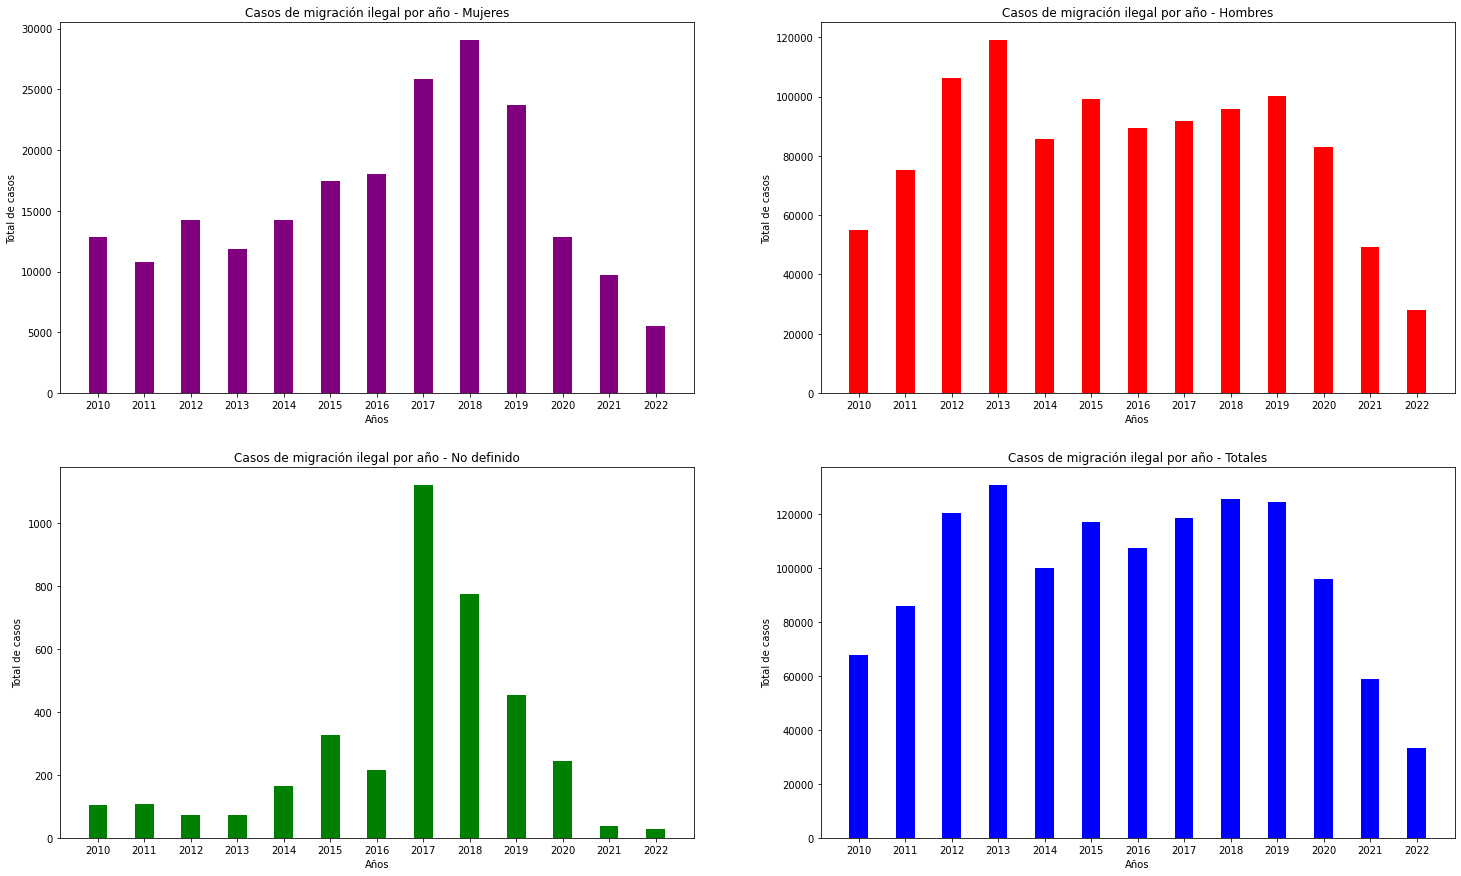

In [378]:
#Gráfica de barras de lo anterior
#importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
 
# creamos las listas de datos a graficar
anns = []
for i in range(2010,2023):
  anns.append(f'{i}')

tot_h = list(casos_h.loc['TOTAL'])
tot_m = list(casos_m.loc['TOTAL'])
tot_nb = list(casos_nb.loc['TOTAL'])
tot_t = list(casos_t.loc['TOTAL'])

# Se crean las gráficas de barras en subplot para visualizar las 5 juntas
fig2 = plt.figure(figsize=(25,15))
fig2.tight_layout()

plt.subplot(221)
plt.title('Casos de migración ilegal por año - Mujeres')
plt.bar(anns, tot_m, color ='purple', width = 0.4)
plt.xlabel("Años")
plt.ylabel("Total de casos")

plt.subplot(222)
plt.title('Casos de migración ilegal por año - Hombres')
plt.bar(anns, tot_h, color ='red', width = 0.4)
plt.xlabel("Años")
plt.ylabel("Total de casos")

plt.subplot(223)
plt.title('Casos de migración ilegal por año - No definido')
plt.bar(anns, tot_nb, color ='green', width = 0.4)
plt.xlabel("Años")
plt.ylabel("Total de casos")

plt.subplot(224)
plt.title('Casos de migración ilegal por año - Totales')
plt.bar(anns, tot_t, color ='blue', width = 0.4)
plt.xlabel("Años")
plt.ylabel("Total de casos")

plt.show()

De lo anterior podemos ver que los casos de mujeres han ido en cada año hasta el 2019, cuando comienzan a decrecer.

Si comparamos con los valores totales, podemos ver que el decremento está presente de manera similar en las gráficas de hombres y totales. Siendo un decremento general y particularmente en años de pandemia, pudiera sugerirse que sí hay un incremento en la cantidad de mujeres que emigran ilegalmente.

###F.3 Tercera pregunta


> 3.- ¿Realmente hubo un deceso de migración ilegal entre 2014 y 2017?


Para responder observaremos solamente la gráfica de casos totales de la respuesta anterior.

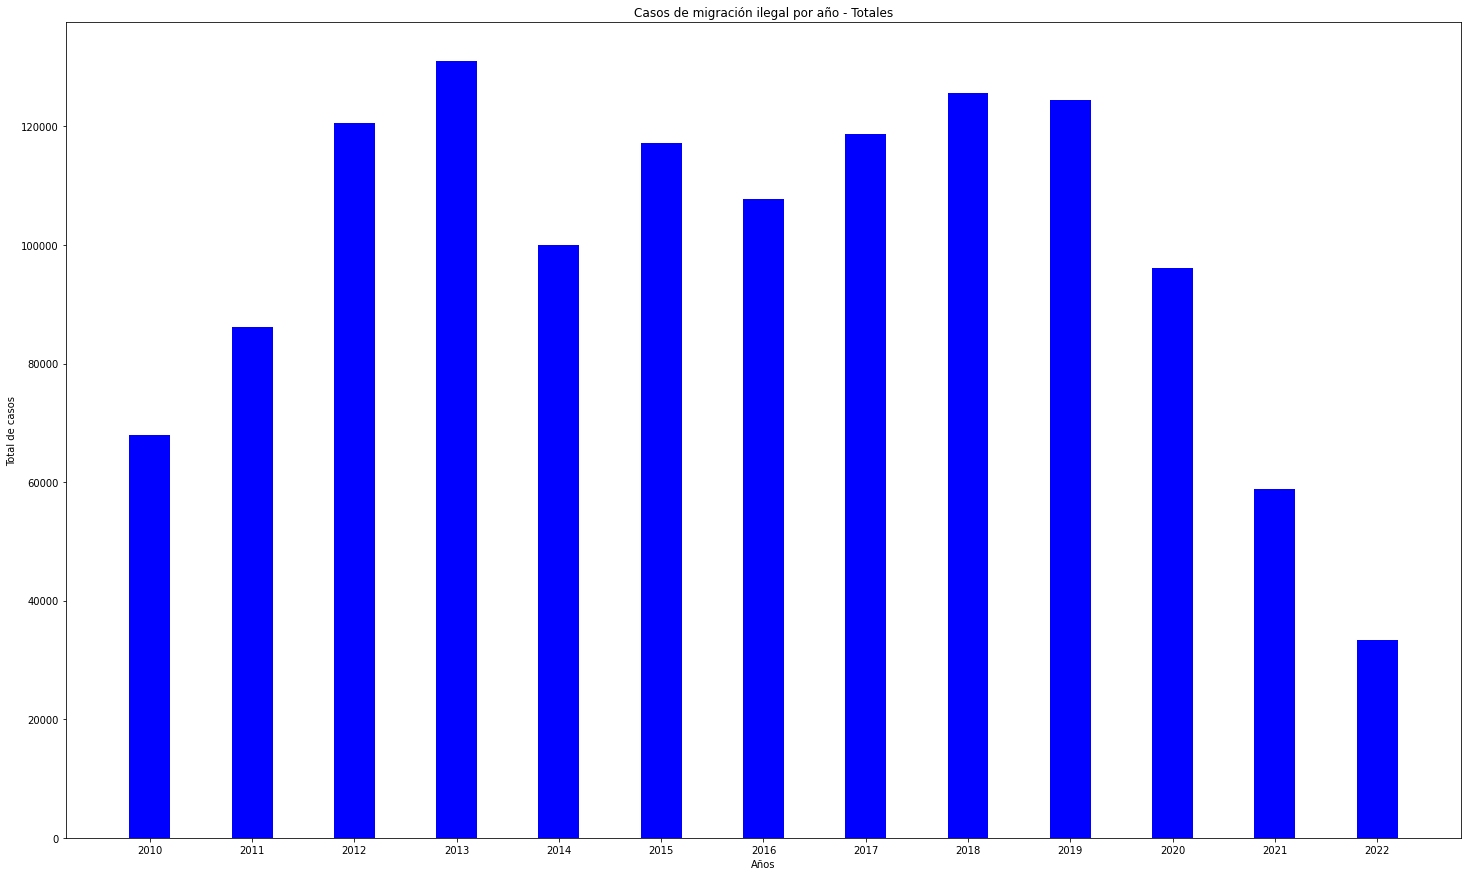

In [379]:
fig2 = plt.figure(figsize=(25,15))
fig2.tight_layout()

plt.title('Casos de migración ilegal por año - Totales')
plt.bar(anns, tot_t, color ='blue', width = 0.4)
plt.xlabel("Años")
plt.ylabel("Total de casos")

plt.show()

Con lo anterior podemos ver que efectivamente, los casos de migración ilegal disminuyeron entre el 2014 y el 2017.

###F.4 Cuarta pregunta


> 4.- ¿Cuál es el porcentaje de menores de edad que cruzan la frontera ilegalmente por sí solos (ley TVPRA)?


Para esto utilizaremos el dataframe **casos_t** para calcular la cantidad de menores bajo ese Rubro de protección, eliminando las columnas de años previos a 2019 para poder compararlo con el total de menores del dataframe **rango_edad_ceros**.

In [443]:
#Crearemos una copia de nuestro dataframe
casos_mig_1922 = casos_t.copy()

#Y eliminaremos las columnas que antecedan a 2019
casos_mig_1922.drop(columns=casos_mig_1922.loc[:,'2010':'2018'].columns, inplace=True)

#Obtenemos el total los casos de menores procesados
TVPRA = list(casos_mig_1922.loc['MENOR PROCESADO BAJO LEY TVPRA',]) # por año
TVPRA_total = casos_mig_1922.loc['MENOR PROCESADO BAJO LEY TVPRA'].sum() # de 2019 a 2022

In [448]:
TVPRA_total

3207

In [444]:
#Obtenemos los totales de menores procesados por año del dataframe rango_edad_ceros
menores_ann = []
for i in [0,3,6,9]:
  suma = 0
  for j in range(0,3):
    suma = suma + rango_edad_ceros.iloc[0,i+j]
  menores_ann.append(suma)
menores_total = sum(menores_ann)

In [450]:
print(f'El porcentaje de menores de edad que cruzan la frontera ilegalmente por sí solos respecto del total de casos de menores entre los años 2019 y 2022 es {round(TVPRA_total*100/menores_total,2)}%')

El porcentaje de menores de edad que cruzan la frontera ilegalmente por sí solos respecto del total de casos de menores entre los años 2019 y 2022 es 8.26%


In [ ]:
Se muestra la proporción por año en la siguiente gráfica.

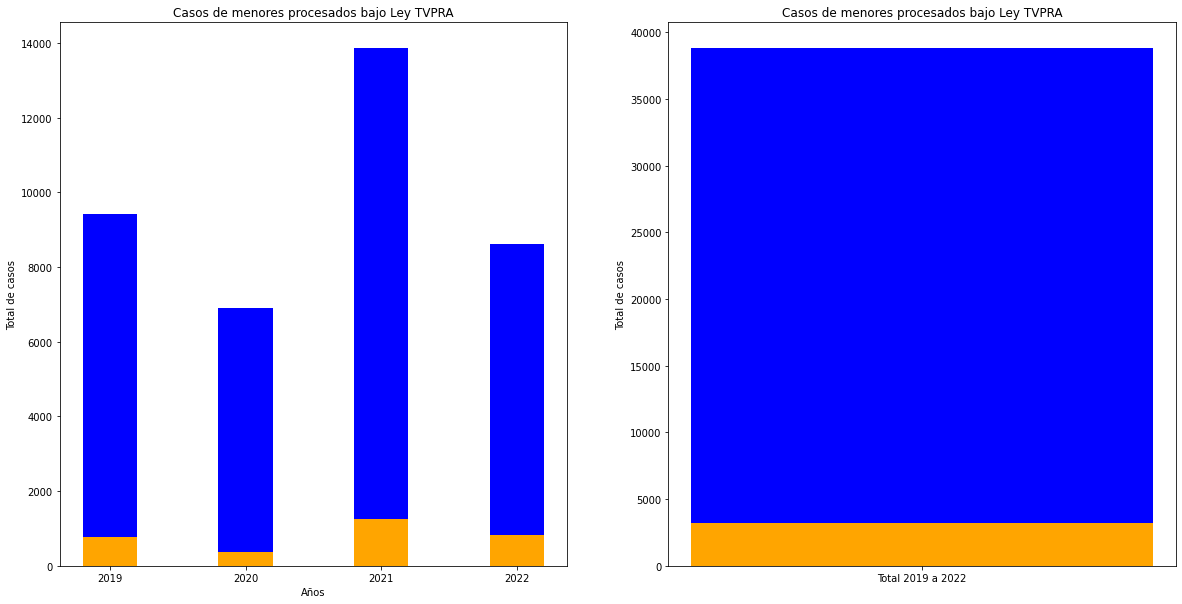

In [456]:
fig2 = plt.figure(figsize=(20,10))
fig2.tight_layout()

plt.subplot(121)
plt.title('Casos de menores procesados bajo Ley TVPRA')
plt.bar(casos_mig_1922.columns, menores_ann, color ='blue', width = 0.4)
plt.bar(casos_mig_1922.columns, TVPRA, color ='orange', width = 0.4)
plt.xlabel("Años")
plt.ylabel("Total de casos")

plt.subplot(122)
plt.title('Casos de menores procesados bajo Ley TVPRA')
plt.bar('Total 2019 a 2022', menores_total, color ='blue', width = 0.2)
plt.bar('Total 2019 a 2022', TVPRA_total, color ='orange', width = 0.2)
#plt.xlabel("Años")
plt.ylabel("Total de casos")

plt.show()

###F.5 Quinta pregunta


> 5.- ¿De qué estado de la República Mexicana provienen la mayoría de los casos?


Para responder a nuestra última pregunta utilizaremos el dataframe de edo_origen, calculando el total de casos por estado y seleccionando el máximo.

In [501]:
  #se elimina la coluna de totales de
  edo_total = edo_origen_ceros.copy()
  edo_total = edo_total.drop(index=['TOTAL','DESC.'])
  
  #Se realiza la suma por filas
  edo_total = edo_total.sum(axis=1)

In [506]:
print(f'El estado con mayor cantidad de casos atendidos es {edo_total.idxmax()} con un total de {edo_total.max()} casos.')

El estado con mayor cantidad de casos atendidos es GUERRERO con un total de 24528 casos.


---
##G. Planes a futuro  - Postwork 8

Dado que este módulo únicamente abarca el procesamiento de datos, y por ende no se finaliza la investigación, proponemos los siguientes puntos para un futuro estudio del tema:

*   Obtener datos más concretos respecto al tipo de trámites realizados en cada oficina del consulado.
* Confirmar el caso de los NaNs o celdas vacías y de la discrepancia en casos de hombres en el 2022.
* Analizar otros casos o responder a otras preguntas que emergieron durante el desarrollo de este proyecto.